In [535]:
# import general packages, check folders
#%reset
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
from pathlib import Path

# TO DO - REMOVE THE UNNECESSARY LIBRARY IMPORTS

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [536]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'


In [537]:
# load behavioral data - coded 1 for "social", 0 for "nonsocial" and 9 for "unsure", nan for missed response
responses = np.load(os.path.join(data_file_loc,'responses.npy'))
responses.shape # subs *movies

(1048, 10)

In [538]:
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical","Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]
vidnames

['COAXING-B',
 'BILLIARD-A',
 'DRIFTING-A',
 'Fishing',
 'Random mechanical',
 'Scaring',
 'SEDUCING-B',
 'STAR-A',
 'SURPRISING-B',
 'TENNIS-A']

In [539]:
coef_slope_rand = np.load(os.path.join(data_file_loc,'coef_slopereg_runnorm_Random mechanical.npy'))
coef_slope_fish = np.load(os.path.join(data_file_loc,'coef_slopereg_runnorm_Fishing.npy'))
coef_slope_coax = np.load(os.path.join(data_file_loc,'coef_slopereg_trialnorm_COAXING-B.npy'))
coef_slope_bill = np.load(os.path.join(data_file_loc,'coef_slopereg_trialnorm_BILLIARD-A.npy'))
coef_slope_all  = np.load(os.path.join(data_file_loc,'coef_slopereg_all.npy'))

print(coef_slope_rand.shape)
coef_slope_all.shape

(1048, 268)


(1048, 268, 2)

# statistics

In [540]:
#from mne.stats import fdr_correction
from multipy.fdr import lsu
#from multipy.data import neuhaus

#pvals = neuhaus()
#significant_pvals = lsu(pvals, q=0.05)
#print(zip(['{:.4f}'.format(p) for p in pvals], significant_pvals))


### rand

In [592]:
# same movie: rand

movie_ind = 4

soc_inds = responses[:,movie_ind]==1 # subs who responded "social"
nonsoc_inds = responses[:,movie_ind]==0 # subs who respoded "nonsocial"

print(f'movie={vid_joined[movie_ind]},soc={len(np.where(soc_inds)[0])},nonsocial={len(np.where(nonsoc_inds)[0])}')

# ttest between slope regs yes vs. no
_,pval_slope_rand = stats.ttest_ind(coef_slope_rand[soc_inds,:], coef_slope_rand[nonsoc_inds,:],axis=0, equal_var=False)
meanDiff_sl_rand = np.nanmean(coef_slope_rand[soc_inds,:],axis=0)-np.nanmean(coef_slope_rand[nonsoc_inds,:],axis=0)

#fdr correction
pval_slope_rand = lsu(pval_slope_rand,q=.05)#fdr_correction(pval_slope_rand,.05)
#_,pval_slope_rand = fdr_correction(pval_slope_rand,.05)
#pval_slope_rand

dirn_rand = np.empty((268,))
for n in range(268):
    if np.abs(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) > np.abs(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)):
        dirn_rand[n] = 1
    elif np.abs(np.nanmean(coef_slope_rand[soc_inds,n],axis=0)) < np.abs(np.nanmean(coef_slope_rand[nonsoc_inds,n],axis=0)):
        dirn_rand[n] = -1
    else:
        dirn_rand[n] = 0


movie=Random mechanical,soc=88,nonsocial=587


### fish

In [542]:
# same movie: fish

movie_ind = 3

soc_inds = responses[:,movie_ind]==1 # subs who responded "social"
nonsoc_inds = responses[:,movie_ind]==0 # subs who respoded "nonsocial"

print(f'movie={vid_joined[movie_ind]},soc={len(np.where(soc_inds)[0])},nonsocial={len(np.where(nonsoc_inds)[0])}')

# ttest between slope regs yes vs. no
_,pval_slope_fish = stats.ttest_ind(coef_slope_fish[soc_inds,:], coef_slope_fish[nonsoc_inds,:],axis=0, equal_var=False)
meanDiff_sl_fish = np.nanmean(coef_slope_fish[soc_inds,:],axis=0)-np.nanmean(coef_slope_fish[nonsoc_inds,:],axis=0)

#fdr correction
#_,pval_slope_fish = fdr_correction(pval_slope_fish,.05)
pval_slope_fish = lsu(pval_slope_fish,q=.05)

dirn_fish = np.empty((268,))
count=0
for n in range(268):
    if np.abs(np.nanmean(coef_slope_fish[soc_inds,n],axis=0)) > np.abs(np.nanmean(coef_slope_fish[nonsoc_inds,n],axis=0)):
        dirn_fish[n] = 1
    elif np.abs(np.nanmean(coef_slope_fish[soc_inds,n],axis=0)) < np.abs(np.nanmean(coef_slope_fish[nonsoc_inds,n],axis=0)):
        dirn_fish[n] = -1
    else:
        dirn_fish[n] = 0

movie=Fishing,soc=757,nonsocial=108


### COAX/BILL

In [543]:
# coax vs bill
movie_inds = [0,1]

print([vid_joined[i] for i in movie_inds])

subs = (responses[:,movie_inds[0]]==1) & (responses[:,movie_inds[1]]==0) # subs who respoded "nonsocial" to BILL and "social" to COAX

_,pval_slope_coaxbill = stats.ttest_rel(coef_slope_coax[subs,:], coef_slope_bill[subs,:],axis=0)
meanDiff_sl_coaxbill = np.nanmean(coef_slope_coax[subs,:]-coef_slope_bill[subs,:],axis=0)

#fdr correction
#_,pval_slope_coaxbill = fdr_correction(pval_slope_coaxbill,.05)
pval_slope_coaxbill = lsu(pval_slope_coaxbill,q=.05)
#pval_slope_coaxbill

dirn_coaxbill = np.empty((268,))
count=0
for n in range(268):
    if np.abs(np.nanmean(coef_slope_coax[subs,n],axis=0)) > np.abs(np.nanmean(coef_slope_bill[subs,n],axis=0)):
        dirn_coaxbill[n] = 1
    elif np.abs(np.nanmean(coef_slope_coax[subs,n],axis=0)) < np.abs(np.nanmean(coef_slope_bill[subs,n],axis=0)):
        dirn_coaxbill[n] = -1
    else:
        dirn_coaxbill[n] = 0

['COAXING-B', 'BILLIARD-A']


### all movies

In [544]:
pval_slope_all = np.empty((268,))
meanDiff_sl_all =  np.empty_like(pval_slope_all)
pval_slope_all[:] = np.nan
meanDiff_sl_all[:] = np.nan

for n in range(268):
    #_,pval_slope_all[n] = stats.ttest_1samp(np.ndarray.flatten(coef_slope_all[:,n,:]),0,nan_policy='omit')
    dat = np.mean(coef_slope_all[:,n,:],axis=1)
    dat = dat[~np.isnan(dat)]
    _,pval_slope_all[n] = stats.ttest_1samp(dat,0,nan_policy='omit')
    meanDiff_sl_all[n] = np.nanmean(dat)
#_,pval_slope_all = fdr_correction(pval_slope_all)
pval_slope_all = lsu(pval_slope_all,q=.05)

#pval_slope_all

In [591]:
nodes_coaxbill_rand_all = (pval_slope_rand) & (pval_slope_coaxbill)  & (pval_slope_all) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_fish)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all))
np.save(os.path.join(data_file_loc,'nodes_coaxbill_rand_all.npy'),nodes_coaxbill_rand_all)
len(np.where(nodes_coaxbill_rand_all)[0])


61

In [589]:
nodes_coaxbill_rand_all.shape

(268,)

In [546]:
nodes_coaxbill_rand_all_fish = (pval_slope_rand) & (pval_slope_coaxbill)  & (pval_slope_all) & (pval_slope_fish) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_fish)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) & \
(np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all))
len(np.where(nodes_coaxbill_rand_all_fish)[0])

1

In [547]:
# are all these nodes with beta soc >beta nonsoc activations or deactivations? let's check
print('rand:',dirn_rand[nodes_coaxbill_rand_all])
print('fish:',dirn_fish[nodes_coaxbill_rand_all])
print('coaxbill:',dirn_coaxbill[nodes_coaxbill_rand_all])

rand: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
fish: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]
coaxbill: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]


- couple of deactivations in some of the nodes, but mostly activations. use these to color???

# Plot figs

In [567]:
def plot_fig(X,Y,xlabel,ylabel):
    #X = stats.zscore(X)
    X = X/np.nanstd(X)
    #Y = stats.zscore(Y)
    Y = Y/np.nanstd(Y)
    plt.plot(X,Y,ls='None',marker='.',alpha = .5,color='grey',label = 'mean "social"-"nonsocial"\nper node',markersize=8)
    r,p = stats.pearsonr(X,Y)
    
    plt.xlabel(xlabel+'/std')
    plt.ylabel(ylabel+'/std')
    xmin,xmax = plt.xlim()
    ymin,ymax = plt.ylim()
    xymin = min(xmin,ymin)
    xymax = max(xmax,ymax)
    xpos = xmin+ .05*(xmax-xmin)
    ypos = ymin+ .9*(ymax-ymin)
    plt.text(xpos,ypos,f'r={r:.2f},\np={p:.1e}')

    
#def best_fit_line(X,Y):
    m, b = np.polyfit(X,Y, 1)
    print(np.poly1d([m,b]))
    xmin,xmax = plt.xlim()
    xplot = np.linspace(xmin,xmax,10)
    plt.plot(xplot, m*xplot + b,ls='dashed',color = 'k',label = 'line of \nbest fit\n(all nodes)')
    #plt.title(np.poly1d([m,b]))

    plt.xlim(xymin,xymax)
    plt.ylim(xymin,xymax)
    #plt.text(xymin,.7*xymax,f'sl.={m:.2f},\nint.={b:.2f}')
    plt.vlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
    plt.hlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
   

def plot_sig_nodes(X,Y,inds):
    #X = stats.zscore(X)
    X = X/np.nanstd(X)
    #Y = stats.zscore(Y)
    Y = Y/np.nanstd(Y)
    plt.plot(X[inds],Y[inds],ls='None',marker='o',mfc='w', mec='k',label = 'pair-wise sig.',ms=8)
    plt.plot(X[nodes_coaxbill_rand_all],Y[nodes_coaxbill_rand_all],ls='None',marker='+',
    mfc='k', mec='k',mew = 3, linewidth = 5,label = 'sig. across all\ncomparisons\nexcept FISH',ms=12)
    #plt.plot(X[nodes_coaxbill_rand_all_fish],Y[nodes_coaxbill_rand_all_fish],ls='None',marker='D',
    #mfc='g', mec='g',label = 'sig. across all\ncomparisons',ms=10)
    

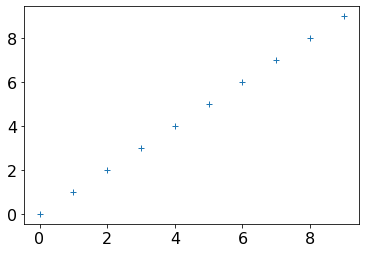

In [566]:
plt.plot(np.arange(10),marker = '+',linewidth=10,ls='None')

 
0.2725 x + 0.6212
 
0.3868 x + 0.08426
 
0.1618 x + 0.3936
 
0.3419 x - 0.1152
 
0.2316 x + 0.07436
 
0.3619 x + 0.09577


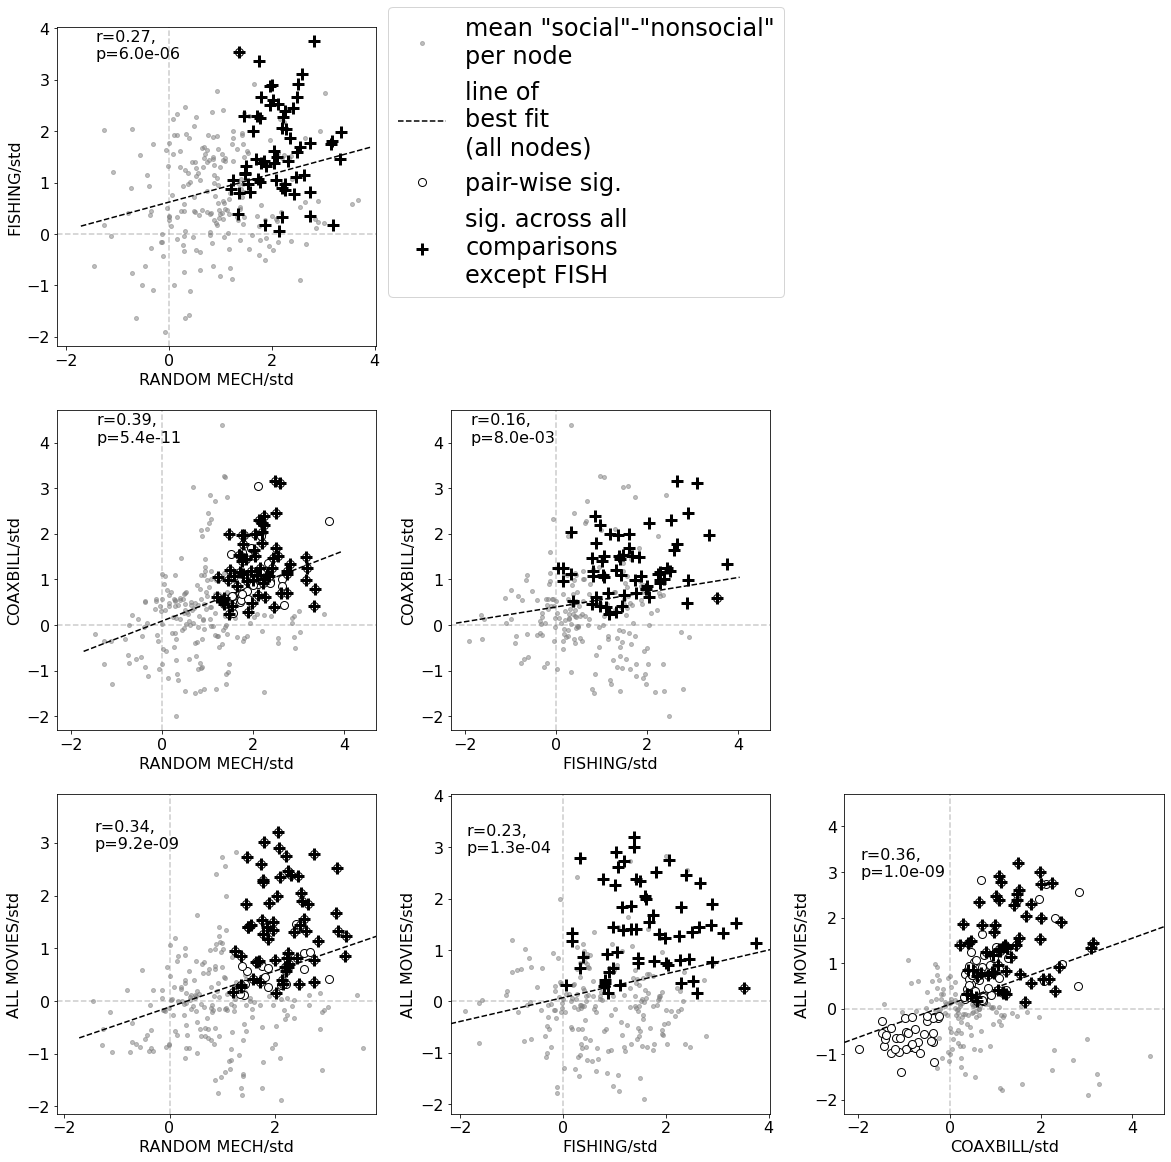

In [568]:
dims = [20,20]
fig= plt.figure(1,figsize = dims)

div = [.05,.38,.71]
w,h = .3,.3

#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')
ax = fig.add_subplot(331)
#ax.set_position([div[0],div[2],w,h]) 
#plt.subplot(331)
#plt.subplot(445)
X,Y = meanDiff_sl_rand,meanDiff_sl_fish
plot_fig(X,Y,'RANDOM MECH','FISHING')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_rand) & (pval_slope_fish) & (np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_fish)) 
plot_sig_nodes(X,Y,inds)
plt.legend(bbox_to_anchor = (1,1.1),fontsize =24)


ax = fig.add_subplot(334)
#ax.set_position([div[0],div[1],w,h]) 
X,Y = meanDiff_sl_rand,meanDiff_sl_coaxbill
plot_fig(X,Y,'RANDOM MECH','COAXBILL')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_rand) & (pval_slope_coaxbill) & (np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_coaxbill)) 
plot_sig_nodes(X,Y,inds)


ax = fig.add_subplot(3,3,5)
#ax.set_position([div[1],div[1],w,h]) 
#plt.subplot(4,4,10)
X,Y = meanDiff_sl_fish,meanDiff_sl_coaxbill
plot_fig(X,Y,'FISHING','COAXBILL')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_fish) & (pval_slope_coaxbill) & (np.sign(meanDiff_sl_fish) == np.sign(meanDiff_sl_coaxbill)) 
plot_sig_nodes(X,Y,inds)


ax = fig.add_subplot(3,3,7)
#ax.set_position([div[0],div[0],w,h]) 
X,Y = meanDiff_sl_rand,meanDiff_sl_all
plot_fig(X,Y,'RANDOM MECH','ALL MOVIES')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_rand) & (pval_slope_all) & (np.sign(meanDiff_sl_rand) == np.sign(meanDiff_sl_all)) 
plot_sig_nodes(X,Y,inds)


ax = fig.add_subplot(3,3,8)
#ax.set_position([div[1],div[0],w,h]) 
#plt.subplot(4,4,14)
X,Y = meanDiff_sl_fish,meanDiff_sl_all
plot_fig(X,Y,'FISHING','ALL MOVIES')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_fish) & (pval_slope_all) & (np.sign(meanDiff_sl_fish) == np.sign(meanDiff_sl_all)) 
plot_sig_nodes(X,Y,inds)


ax = fig.add_subplot(3,3,9)
#ax.set_position([div[2],div[0],w,h]) 
#plt.subplot(4,4,15)
X,Y = meanDiff_sl_coaxbill,meanDiff_sl_all
plot_fig(X,Y,'COAXBILL','ALL MOVIES')
ax.set_aspect('equal')
#signodes
inds =  (pval_slope_coaxbill) & (pval_slope_all) & (np.sign(meanDiff_sl_coaxbill) == np.sign(meanDiff_sl_all)) 
plot_sig_nodes(X,Y,inds)


#plt.tight_layout()

## Plot brainmaps

In [550]:
#import plotting functions

from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import plot_glass_brain
import nibabel as nib

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)


lbl = [str.upper(x[0:4]) for x in vidnames]
#lbl

In [551]:
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
shen268_lbl

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.6...","{'coords': [9.599999999999994, 17.618823529411...","{'coords': [5.270633397312864, 35.032629558541...","{'coords': [15.647840531561457, 34.18604651162...","{'coords': [8.283887468030684, 46.058823529411...","{'coords': [14.581460674157299, 64.75280898876...","{'coords': [30.41914191419142, 54.795379537953...","{'coords': [44.469325153374236, 46.09509202453...","{'coords': [28.814814814814817, 51.16316316316...","{'coords': [8.521081081081078, 53.28, 23.88540...",...,"{'coords': [-10.399527186761233, 10.8770685579...","{'coords': [-14.491582491582491, -3.5488215488...","{'coords': [-24.77079107505071, 5.537525354969...","{'coords': [-9.427230046948353, -25.5399061032...","{'coords': [-4.68474576271187, -10.24067796610...","{'coords': [-11.407792207792212, -25.563636363...","{'coords': [-4.821052631578951, -21.5115789473...","{'coords': [-4.227272727272734, -37.8977272727...","{'coords': [-6.9375, -33.13068181818181, -39.3...","{'coords': [-5.697885196374628, -18.9667673716..."


In [552]:
pwd

'/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code/on GitHub/regressor_based_analyses'

In [587]:
shen268

In [553]:
def color_rois(values):
    
    """
    This function assumes you are passing a vector "values" with the same length as the number of nodes in the atlas.
    """
    shen268 = nib.load(os.path.join(data_file_loc,"shen_2mm_268_parcellation.nii.gz"))
    shen268_data = shen268.get_fdata()
    img = np.zeros(shen268_data.shape)
    #print(shen268_data.shape)
    for roi in range(len(values)):
        itemindex = np.where(shen268_data==roi+1) # find voxels in this node (add 1 to account for zero-indexing)
        #print(len(itemindex[0]))
        img[itemindex] = values[roi] # color them by the desired value 

    affine = shen268.affine
    img_nii = nib.Nifti1Image(img, affine)
    
    return img_nii

In [582]:
cols = ['k','grey','g']
lw = [3,2,1]

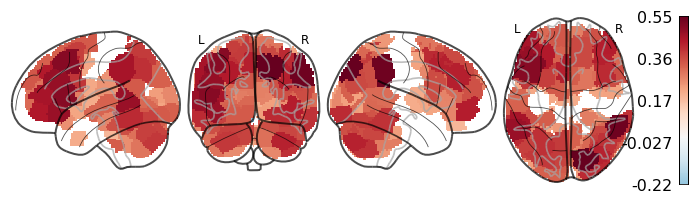

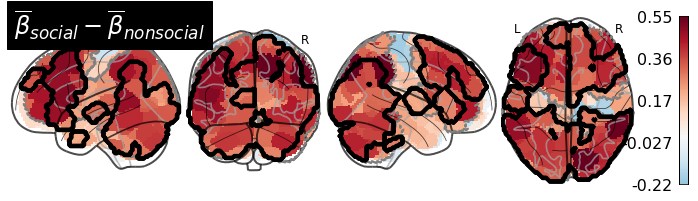

In [728]:
nodes = np.zeros((268,))
nodes[pval_slope_rand] = meanDiff_sl_rand[pval_slope_rand]
img = roi_to_brain(pd.Series(nodes), mask_x)
plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)

txt = r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$'
#txt = 'RANDOM MECH [' + r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$' + ']'
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
img = roi_to_brain(pd.Series(meanDiff_sl_rand), mask_x)
glassb = plot_glass_brain(img.to_nifti(),title = txt, symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True,vmin=-.22,vmax=.55)
glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#glassb.annotate(scalebar=True)
glassb.add_contours(color_rois(pval_slope_rand),linewidths=lw[1], colors=[cols[1]],linestyles='dotted')
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
#glassb.add_contours(color_rois(nodes_coaxbill_rand_all_fish),linewidths=lw[2], colors=[cols[2]],filled=True,linestyle='dashed')
#cbar = plt.colorbar(glassb)
#cbar.set_label('# of contacts', rotation=270)


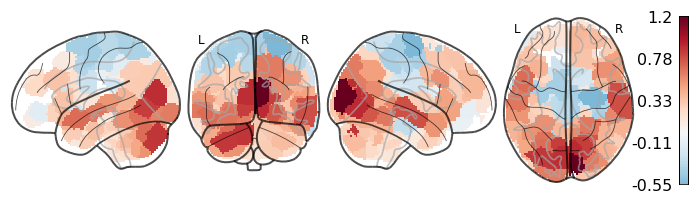

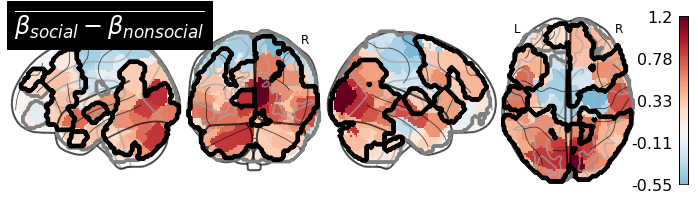

In [727]:
nodes = np.zeros((268,))
nodes[pval_slope_coaxbill] = meanDiff_sl_coaxbill[pval_slope_coaxbill]
img = roi_to_brain(pd.Series(nodes), mask_x)
plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)


img = roi_to_brain(pd.Series(meanDiff_sl_coaxbill), mask_x)
#txt = 'COAX-BILL [' + r'$\overline{\beta_{social}-{\beta}_{nonsocial}}$' + ']'
txt = r'$\overline{\beta_{social}-{\beta}_{nonsocial}}$'
#txt = f"COAXBILL"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
#img = roi_to_brain(pd.Series(earliest_pt-max(earliest_pt)), mask_x)
glassb = plot_glass_brain(img.to_nifti(),title = txt, symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb.add_contours(color_rois(pval_slope_coaxbill),linewidths=lw[1], colors=[cols[1]],linestyle='dashed')
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyle='dashed')
#glassb.add_contours(color_rois(nodes_coaxbill_rand_all_fish),linewidths=lw[2], colors=[cols[2]],filled=True,linestyle='dashed')



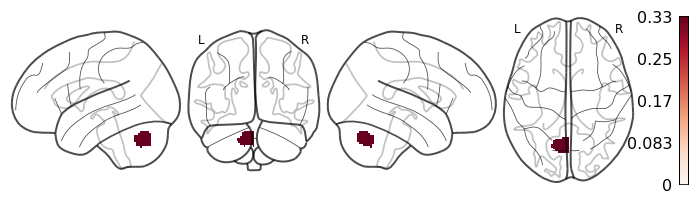

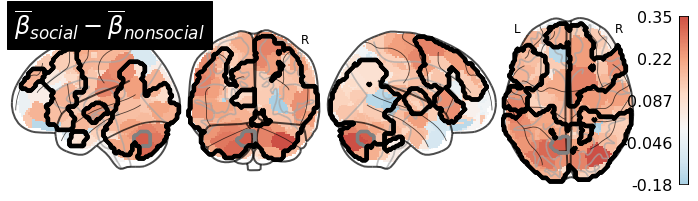

In [726]:
nodes = np.zeros((268,))
nodes[pval_slope_fish] = meanDiff_sl_fish[pval_slope_fish]
img = roi_to_brain(pd.Series(nodes), mask_x)
plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)

img = roi_to_brain(pd.Series(meanDiff_sl_fish), mask_x)
#txt = 'FISHING [' + r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$' + ']'
txt = r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$'
#txt = f"FISHING"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
#img = roi_to_brain(pd.Series(earliest_pt-max(earliest_pt)), mask_x)
glassb = plot_glass_brain(img.to_nifti(),title = txt, symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True,vmin=-.22,vmax=.55)
glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb.add_contours(color_rois(pval_slope_fish),linewidths=lw[1], colors=[cols[1]],linestyle='dashed')
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyle='dashed')
#glassb.add_contours(color_rois(nodes_coaxbill_rand_all_fish),linewidths=lw[2], colors=[cols[2]],filled=True,linestyle='dashed')


/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: The following kwargs were not used by contour: 'linestyle'
  **kwargs)


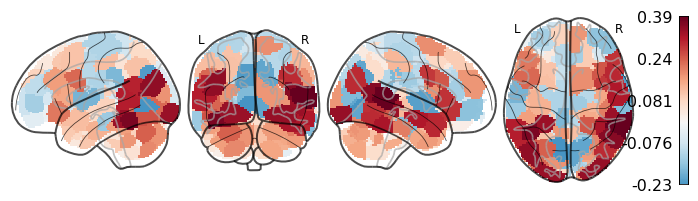

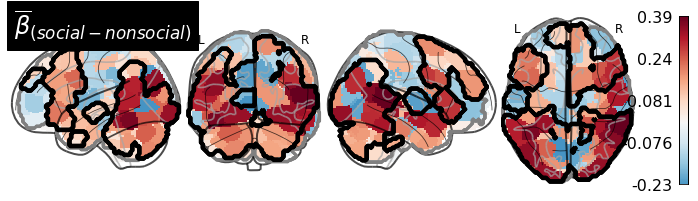

In [725]:
nodes = np.zeros((268,))
nodes[pval_slope_all] = meanDiff_sl_all[pval_slope_all]
img = roi_to_brain(pd.Series(nodes), mask_x)
plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)

img = roi_to_brain(pd.Series(meanDiff_sl_all), mask_x)
#txt = 'ALL MOVIES'
txt = r'$\overline{\beta}_{(social-nonsocial)}$'
#txt = f"ALL MOVIES"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
#img = roi_to_brain(pd.Series(earliest_pt-max(earliest_pt)), mask_x)
#plt.figure(2,figsize=(6,2))
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.tight_layout()
#f.get_children()[0].color = 'g'
glassb.add_contours(color_rois(pval_slope_all),linewidths=lw[1], colors=[cols[1]],linestyle='dotted')
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyle='dashed')
#glassb.add_contours(color_rois(nodes_coaxbill_rand_all_fish),linewidths=lw[2], colors=[cols[2]],filled=True,linestyle='dashed')


/Users/f0053cz/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: The following kwargs were not used by contour: 'linestyle'
  **kwargs)


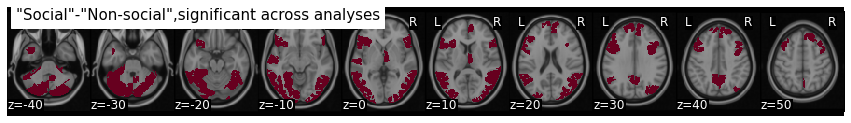

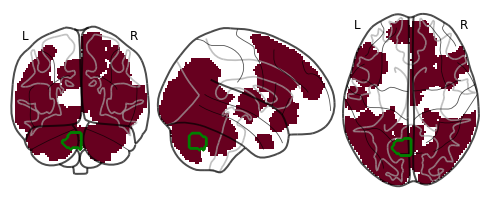

In [458]:
nodes = np.zeros((268,))
nodes[nodes_coaxbill_rand_all] = 1
img = roi_to_brain(pd.Series(nodes), mask_x)
txt = '"Social"-"Non-social",significant across analyses'
img.plot(title = txt,cmap='RdBu_r')
glassb = plot_glass_brain(img.to_nifti(), cmap='RdBu_r')
glassb.add_contours(color_rois(nodes_coaxbill_rand_all_fish),linewidths=1, colors=['g'],linestyle='dotted')



In [463]:
x = [.0005,.03,.02,.1]
fdr_correction(x,.001)

(array([False, False, False, False]), array([0.002, 0.04 , 0.04 , 0.1  ]))

In [483]:
from multipy.fdr import lsu
#from multipy.data import neuhaus

significant_pvals = lsu(np.array(x), q=0.01)
#print(zip(['{:.4f}'.format(p) for p in x], significant_pvals))
significant_pvals

array([ True, False, False, False])

In [469]:
#pip install multipy

  Created wheel for multipy: filename=multipy-0.16-py3-none-any.whl size=41446 sha256=4dc9573fea59dfc5d7c628cc796449d3d4f29294d336c904ded703756c3e30ac
  Stored in directory: /Users/f0053cz/Library/Caches/pip/wheels/44/76/f7/a1ef3c2b183ad6de0116be3f063a3c78c6795248765c62edfc
Successfully built multipy
Note: you may need to restart the kernel to use updated packages.
